In [1]:
## Data Collection
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import  pandas as pd

## load the dataset
data=gutenberg.raw('shakespeare-hamlet.txt')
## save to a file
with open('hamlet.txt','w') as file:
    file.write(data)

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\spars\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
## Data Preprocessing

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

##laod the dataset
with open('hamlet.txt','r') as file:
    text=file.read().lower()

## Tokenize the text-creating indexes for words
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
total_words=len(tokenizer.word_index)+1
total_words



4818

In [3]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [4]:
import pickle
with open('tokenizer.pkl','wb') as file:
    pickle.dump(tokenizer,file)

In [5]:
## create inoput sequences
input_sequences=[]
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)

        

In [6]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [7]:
## Pad Sequences
max_sequence_len=max([len(x) for x in input_sequences])
max_sequence_len

14

In [8]:
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]])

In [9]:
##create predicitors and label
import tensorflow as tf
x,y=input_sequences[:,:-1],input_sequences[:,-1]

In [10]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]])

In [11]:
y

array([ 687,    4,   45, ..., 1047,    4,  193])

In [12]:
y=tf.keras.utils.to_categorical(y,num_classes=total_words)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
len(x_train),len(y_train)

(20585, 20585)

In [ ]:
# ## Train our LSTM RNN

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU

# ## Define the model
# model=Sequential()
# model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
# model.add(LSTM(150,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(100))
# model.add(Dense(total_words,activation="softmax"))

# # #Compile the model
# model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
# model.summary()

c:\Users\spars\intelpython3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
#GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(GRU(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dense(total_words,activation="softmax"))

# #Compile the model
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

c:\Users\spars\intelpython3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.0314 - loss: 7.1988 - val_accuracy: 0.0354 - val_loss: 6.8520
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.0324 - loss: 6.5042 - val_accuracy: 0.0460 - val_loss: 6.8422
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.0483 - loss: 6.2658 - val_accuracy: 0.0575 - val_loss: 6.7964
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.0646 - loss: 6.0261 - val_accuracy: 0.0694 - val_loss: 6.7902
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0816 - loss: 5.7038 - val_accuracy: 0.0707 - val_loss: 6.7910
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.0973 - loss: 5.3933 - val_accuracy: 0.0703 - val_loss: 6.9090
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.1024 - loss: 5.1378 - val_accuracy: 0.0668 - val_loss: 7.0027
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1215 - loss: 4

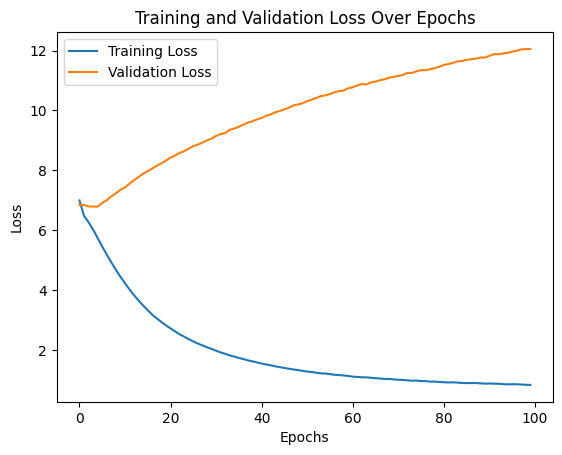

In [17]:
import matplotlib.pyplot as plt

# Fit the model and capture the history
## Train the model
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),verbose=1)


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Save the plot as an image file
plt.savefig('training_validation_loss.png')

# Display the plot
plt.show()


In [18]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [19]:
input_text="Hey"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:Hey
Next Word PRediction:non


In [24]:
model.save('GRU_WordPrediction.keras')

In [22]:
def predict_next_words(model, tokenizer, text, max_sequence_len, num_words=3):
    # Start with the initial text
    for _ in range(num_words):
        # Tokenize the input text
        token_list = tokenizer.texts_to_sequences([text])[0]
        # Ensure the sequence length matches max_sequence_len-1
        if len(token_list) >= max_sequence_len:
            token_list = token_list[-(max_sequence_len-1):]
        # Pad the sequence to max_sequence_len - 1
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        # Predict the next word
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        
        # Find the word corresponding to the predicted index
        predicted_word = None
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                predicted_word = word
                break
        
        # If no word is found, stop prediction
        if not predicted_word:
            break
        
        # Append the predicted word to the input text
        text += " " + predicted_word
    
    return text

input_text="Hello"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_words(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")


Input text:Hello
Next Word PRediction:Hello player i haue
